In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# __MISSING VALUE__

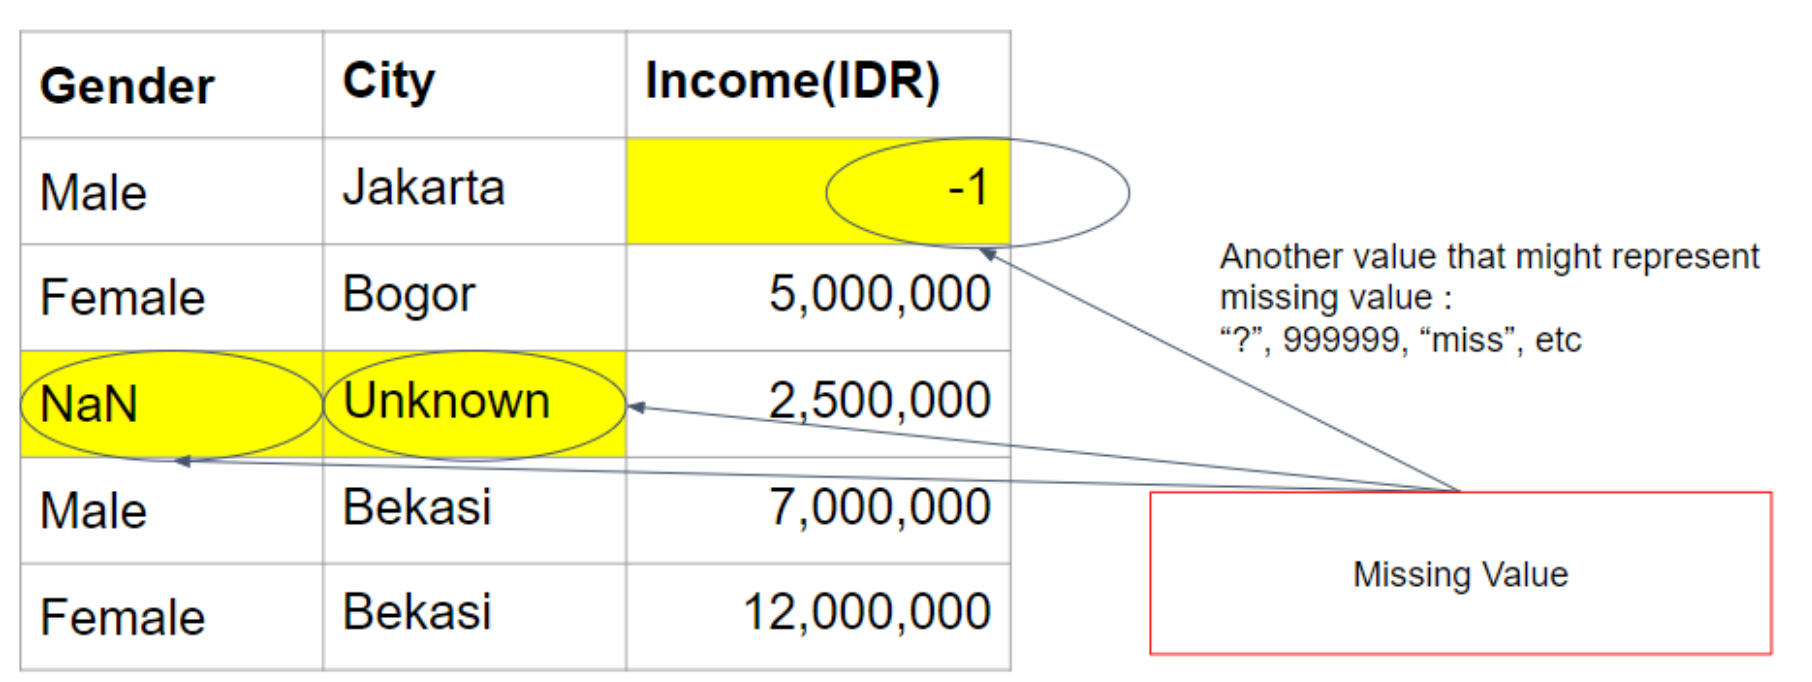

In [2]:
#Membuat data dummy

df = pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan],
    'x7':[3,5,4,5,'-',5]
    })
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10,A,X,M,3
1,5.0,5.0,11,A,Y,M,5
2,NaN,6.0,12,C,X,NaN,4
3,6.0,5.0,9,C,X,M,5
4,7.0,NaN,8,D,NaN,N,-
5,9.0,5.0,11,NaN,Y,NaN,5


In [3]:
#Mengecek info dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5 non-null      float64
 1   x2      5 non-null      float64
 2   x3      6 non-null      int64  
 3   x4      5 non-null      object 
 4   x5      5 non-null      object 
 5   x6      4 non-null      object 
 6   x7      6 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 464.0+ bytes


In [4]:
#Mengecek value

df['x7'].value_counts()

5    3
4    1
3    1
-    1
Name: x7, dtype: int64

> ## __SIMPLE IMPUTER__

In [5]:
from sklearn.impute import SimpleImputer

> ##### __1. Simple Imputer : Mean__

In [6]:
#Impute numerikal dengan mean

imp_num = SimpleImputer(strategy = 'mean')
df[['x1', 'x2', 'x3']] = imp_num.fit_transform(df[['x1', 'x2', 'x3']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3
1,5.0,5.0,11.0,A,Y,M,5
2,6.2,6.0,12.0,C,X,NaN,4
3,6.0,5.0,9.0,C,X,M,5
4,7.0,4.8,8.0,D,NaN,N,-
5,9.0,5.0,11.0,NaN,Y,NaN,5


> ##### __2. Simple Imputer : Mode__

In [7]:
#Impute kategorikal dengan modus

imp_mode = SimpleImputer(strategy='most_frequent')
df[['x4', 'x5']] = imp_mode.fit_transform(df[['x4', 'x5']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3
1,5.0,5.0,11.0,A,Y,M,5
2,6.2,6.0,12.0,C,X,NaN,4
3,6.0,5.0,9.0,C,X,M,5
4,7.0,4.8,8.0,D,X,N,-
5,9.0,5.0,11.0,A,Y,NaN,5


> ##### __3. Simple Imputer : Constant__

In [8]:
#Impute kategorikal dengan constant value

imp_const = SimpleImputer(strategy='constant', fill_value='P')
df[['x6']] = imp_const.fit_transform(df[['x6']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3
1,5.0,5.0,11.0,A,Y,M,5
2,6.2,6.0,12.0,C,X,P,4
3,6.0,5.0,9.0,C,X,M,5
4,7.0,4.8,8.0,D,X,N,-
5,9.0,5.0,11.0,A,Y,P,5


In [9]:
#Impute kategorikal dengan constant value (dijadikan nan), dimana missing value ditentukan

imp_const = SimpleImputer(missing_values='-', strategy='constant', fill_value=np.nan)
df[['x7']] = imp_const.fit_transform(df[['x7']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3.0
1,5.0,5.0,11.0,A,Y,M,5.0
2,6.2,6.0,12.0,C,X,P,4.0
3,6.0,5.0,9.0,C,X,M,5.0
4,7.0,4.8,8.0,D,X,N,NaN
5,9.0,5.0,11.0,A,Y,P,5.0


In [10]:
#Mengecek data info lagi untuk memasikan hasil imputer

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6 non-null      float64
 1   x2      6 non-null      float64
 2   x3      6 non-null      float64
 3   x4      6 non-null      object 
 4   x5      6 non-null      object 
 5   x6      6 non-null      object 
 6   x7      5 non-null      float64
dtypes: float64(4), object(3)
memory usage: 464.0+ bytes


> ## __ITERATIVE IMPUTER__

interative imputer works for numerical only. You can fill the missing value simultaneusly.

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [12]:
#Menyiapkan dataset

df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [13]:
#1. Melakukan impute numerikal sekaligus untuk dataframe

imp_iter = IterativeImputer(max_iter=10, random_state=0) #max_iter = jumlah maksimal itterative
df[['x1', 'x2', 'x3']] = imp_iter.fit_transform(df[['x1', 'x2', 'x3']])

df

,x1,x2,x3,x4
0,4.30000,2.900000,9.000000,A
1,5.10000,5.100000,11.100000,A
2,7.18363,6.300000,9.823389,C
3,6.30000,4.900000,8.900000,C
4,7.40000,5.073866,9.100000,D
5,9.10000,5.400000,11.000000,D


> ##  __NEAREST NEIGHBOUR IMPUTER__

Nearest neighbour imputer also work for numerical only. You can also fill the missing value simultaneusly.

In [14]:
from sklearn.impute import KNNImputer

In [15]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [16]:
#Impute numerikal dengan 

imp_knn = KNNImputer(n_neighbors=2, weights='uniform') #uniform == semuanya dianggap setara
df[['x1', 'x2', 'x3']] = imp_knn.fit_transform(df[['x1', 'x2', 'x3']])

df

,x1,x2,x3,x4
0,4.3,2.90,9.00,A
1,5.1,5.10,11.10,A
2,7.1,6.30,11.05,C
3,6.3,4.90,8.90,C
4,7.4,5.15,9.10,D
5,9.1,5.40,11.00,D
